Algoritmo de Viola-Jones com Haar Cascades

In [74]:

import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [75]:
# imprime a imagem
def showImage(image):
    # definindo o tamanho da imagem
    img = plt.figure(figsize=(15,14))
    ax = img.add_subplot(111)
    ax.imshow(image, cmap='gray')

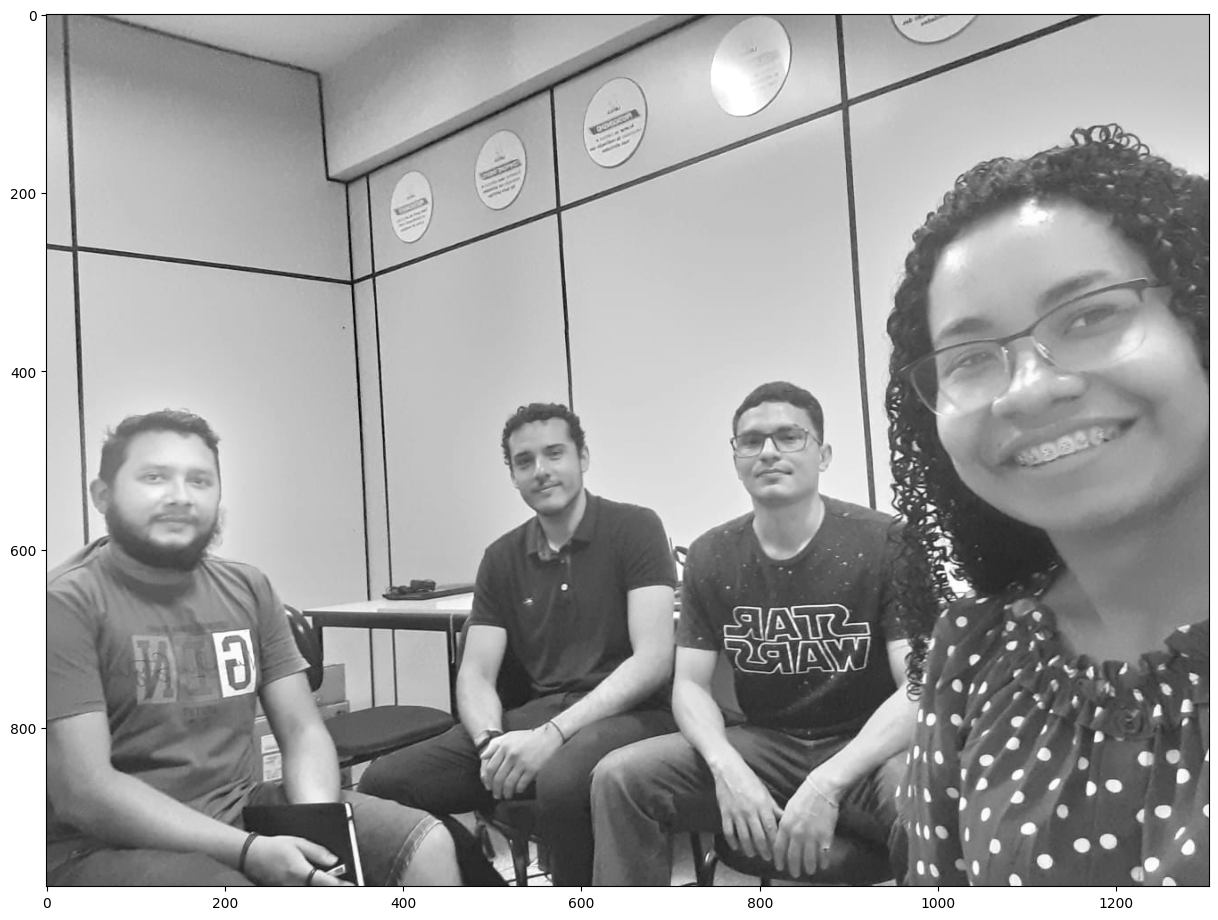

In [76]:
# carregando a imagem
labexImage = cv2.imread('../../assets/lafoca.jpeg')
# transformando a imagem para cinza
labexImage = cv2.cvtColor(labexImage, cv2.COLOR_BGR2GRAY)
showImage(labexImage)


In [77]:
# inicializando o algoritmo
eyeCascade = cv2.CascadeClassifier('../../lib/haarcascades/haarcascade_eye_tree_eyeglasses.xml')
faceCascade = cv2.CascadeClassifier('../../lib/haarcascades/haarcascade_frontalface_default.xml')

In [93]:
# detecção do rosto
def faceDetector(image):
    global count
    count = 0
    # fazendo uma cópia da imagem
    faceImage = image.copy()

    # aplicando o algoritmo para detectar face
    faceRectangle = faceCascade.detectMultiScale(image=faceImage, scaleFactor=1.2, minNeighbors=4)

    for (x,y,w,h) in faceRectangle:
        # contabiliza o número de pessoas identificadas
        count += 1
        # inserindo o retângulo para identificar o rosto
        cv2.rectangle(faceImage, pt1=(x,y), pt2=(x+w, y+h), color=(255,0,0), thickness=2)

        # Aplicando algoritmo para identificar olhos na região do rosto
        roi = image[y:y+h, x:x+w]
        eye_circles = eyeCascade.detectMultiScale(roi, scaleFactor=1.2, minNeighbors=4)

        for (ex, ey, ew, eh) in eye_circles:
            # Inserindo círculo nos olhos
            cv2.circle(faceImage, center=(x+ex+ew//2, y+ey+eh//2), radius=10, color=(0, 255, 0), thickness=2)


    return faceImage


4


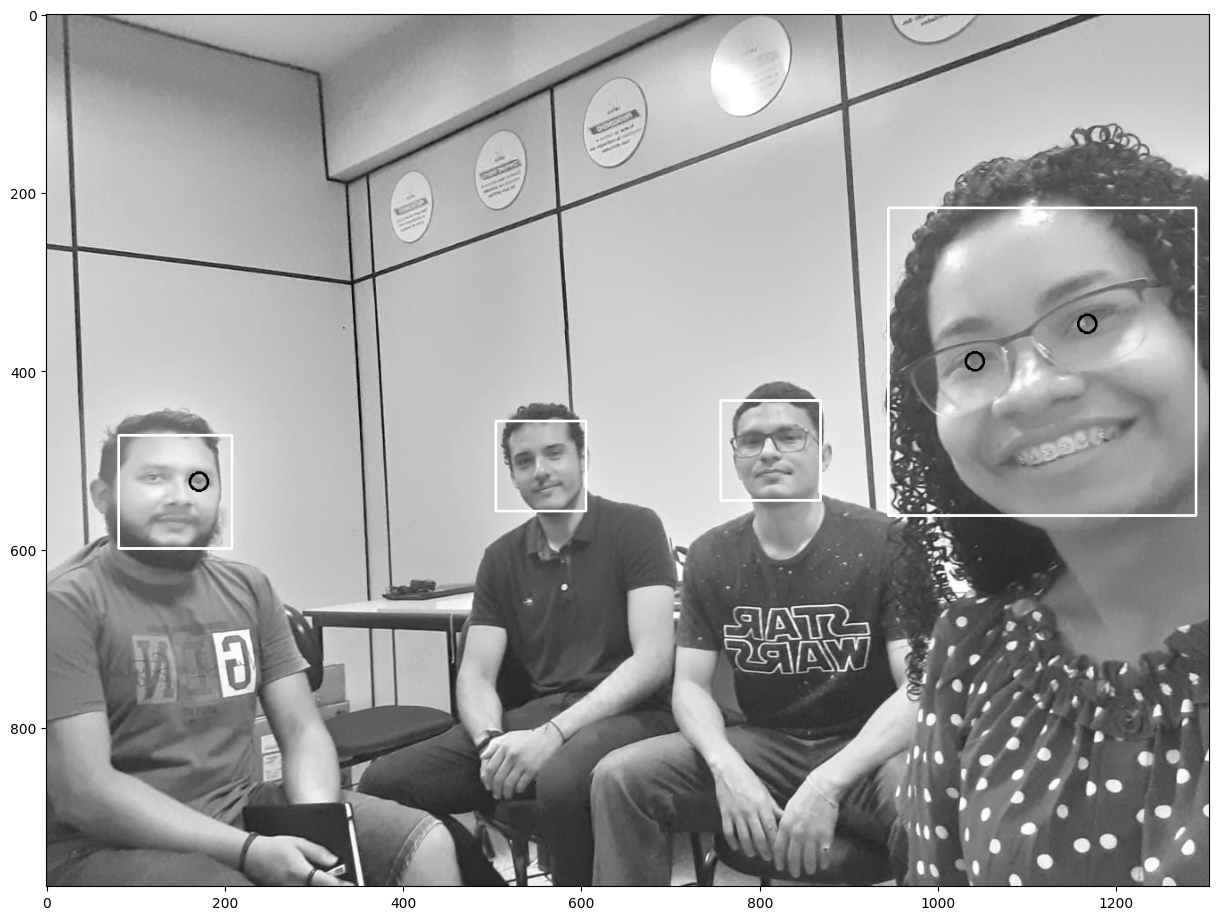

In [94]:
# aplicando a detecção na imagem
detectorResult = faceDetector(labexImage)
# mostrando o resultado da detecção
print(count)
showImage(detectorResult)